<a href="https://colab.research.google.com/github/ShehryarAmir/TheSparksFoundation-Tasks/blob/main/Task_2_Prediction_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Shehryar Aamer

# Step 1 : Loading the dataset and importing libraries

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

iris_dataset = load_iris()


# Step 2 : Access the data and labels

The data is a 2D NumPy array, where each row represents a single flower and each column represents a measurement. The labels are a 1D NumPy array, where each element is an integer representing the species of the corresponding flower. The integer labels are often encoded as follows: 0 for Iris setosa, 1 for Iris versicolor, and 2 for Iris virginica.

In [2]:
data = iris_dataset['data']
labels = iris_dataset['target']


# Step 3 : Showing the first and last five rows of data

In [3]:
# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

# Add the labels as a column in the DataFrame
df['species'] = pd.Categorical.from_codes(iris_dataset['target'], iris_dataset['target_names'])

# Print the first few rows of the DataFrame
df.head()


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal length,sepal width,petal length,petal width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
# Print the target names
print(iris_dataset['target_names'])


['setosa' 'versicolor' 'virginica']


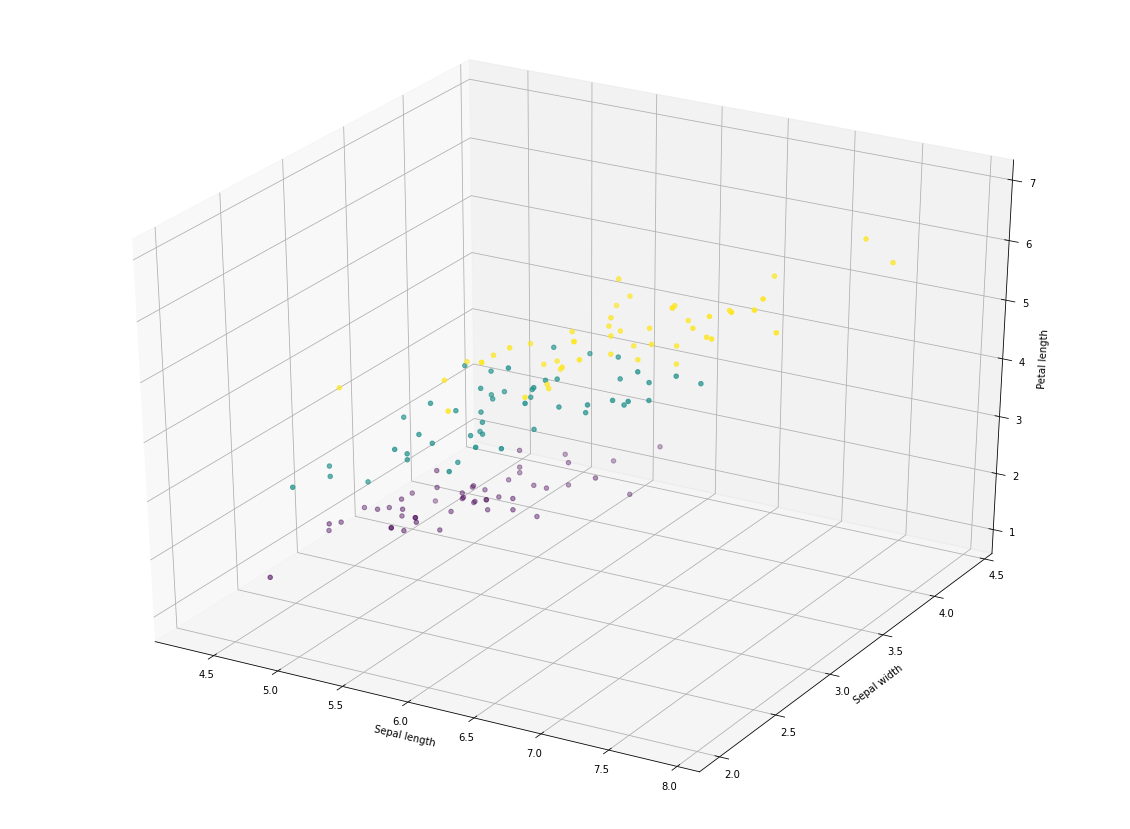

In [6]:
# Extract the sepal length, sepal width, and petal length
sepal_length = data[:, 0]
sepal_width = data[:, 1]
petal_length = data[:, 2]

# Create a 3D scatter plot
fig = plt.figure(1, figsize=(20,15))
ax = plt.axes(projection='3d')
ax.scatter3D(sepal_length, sepal_width, petal_length, c=labels, cmap='viridis')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

Histograms can be used to visualize the distribution of a variable. For example,histogram to visualize the distribution of sepal lengths in the iris data set.

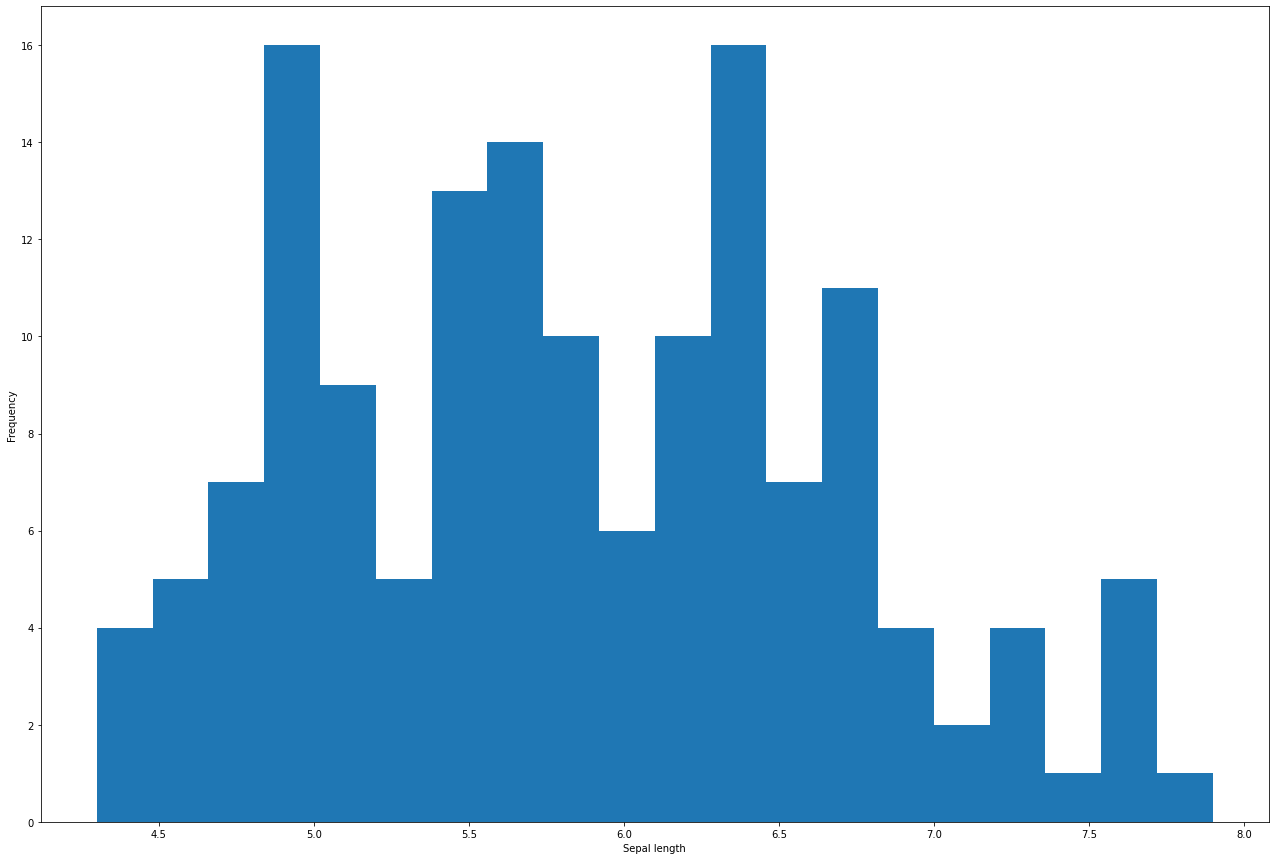

In [7]:
# Extract the sepal lengths
sepal_lengths = data[:, 0]

# Create a histogram
plt.figure(figsize=(22,15))
plt.hist(sepal_lengths, bins=20)
plt.xlabel('Sepal length')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Compute the hierarchical clustering
Z = linkage(data, method='ward')

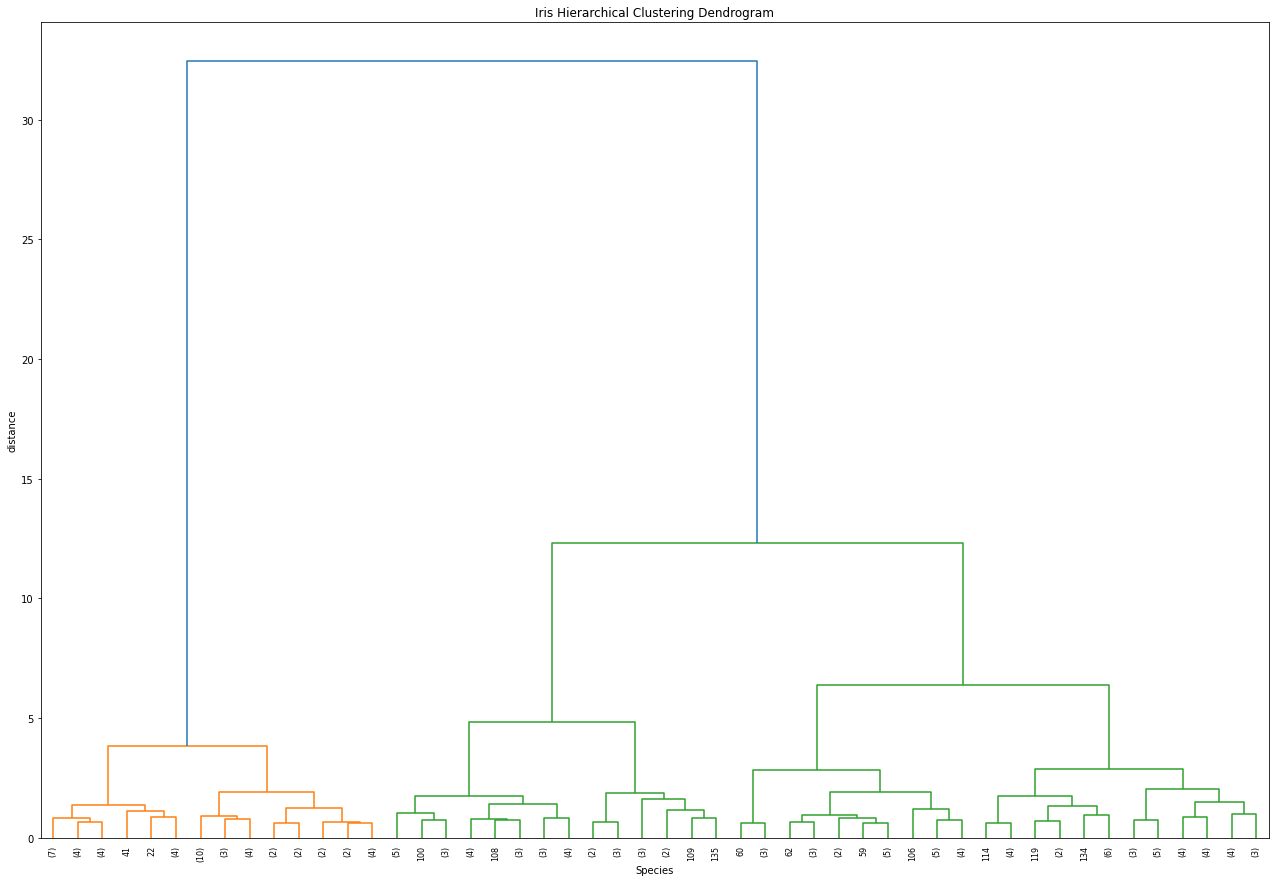

In [9]:
# Create a dendrogram
plt.figure(figsize=(22,15))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(Z, truncate_mode='lastp',  
    p=50, leaf_rotation=90.,      
    leaf_font_size=8.,)
plt.show()


# A heatmap to visualize the hierarchical structure of the data. A heatmap is a graphical representation of data where the values are represented as colors.

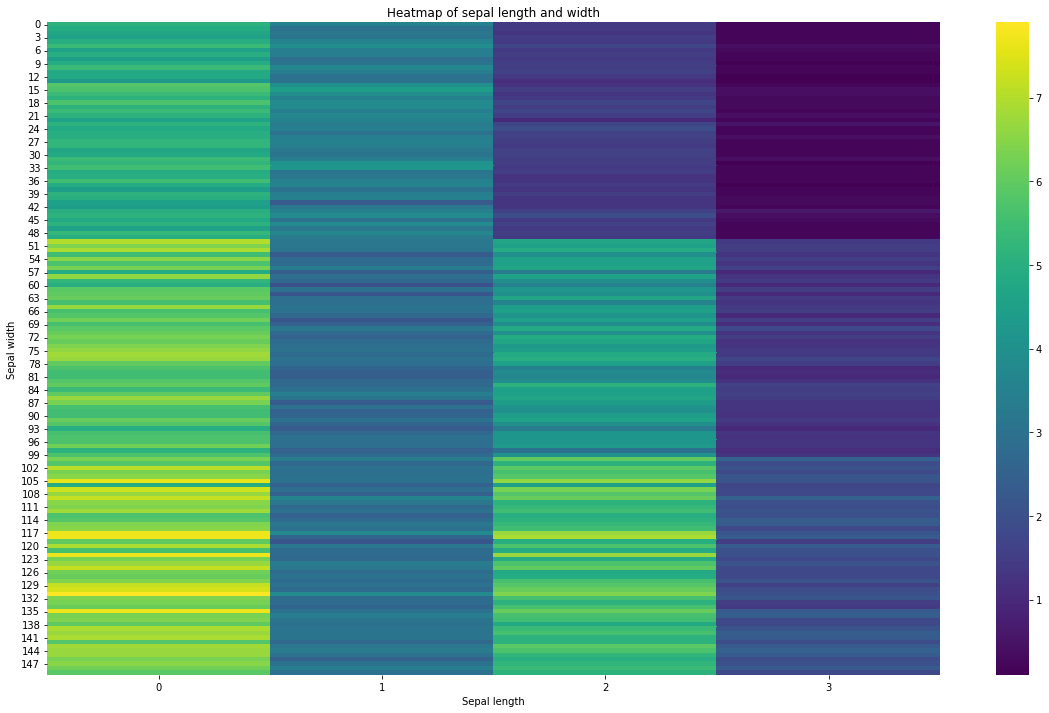

In [11]:
# Create a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(data, cmap='viridis')

# Add labels to the x-axis and y-axis
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Add a title
plt.title('Heatmap of sepal length and width')
plt.show()


In [12]:
# Create a k-means model
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(data)

# Predict the cluster labels
y_pred = kmeans.predict(data)

# Print the cluster labels
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


To compare the results of classification before and after applying a model, you can create scatter plots of the data and color the points according to their true labels (before classification) and predicted labels (after classification).

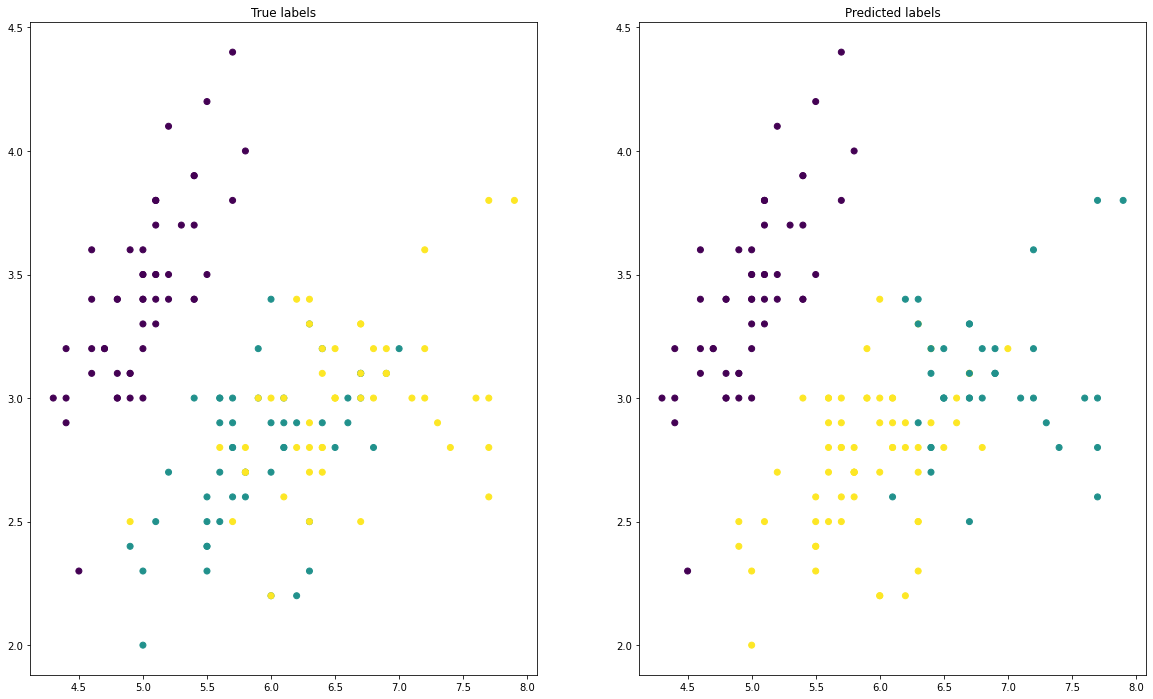

In [13]:
# Extract the feature values and labels
data = iris_dataset['data']
y_true = iris_dataset['target']
y_pred = kmeans.predict(data)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# Create a scatter plot of the true labels
ax1.scatter(data[:, 0], data[:, 1], c=y_true, cmap='viridis')


# Add a title
ax1.set_title('True labels')

# Create a scatter plot of the predicted labels
ax2.scatter(data[:, 0], data[:, 1], c=y_pred, cmap='viridis')


# Add a title
ax2.set_title('Predicted labels')

# Show the plots
plt.show()

The subplots function is used to create a figure with two subplots, and the scatter function is used to create scatter plots of the true labels and predicted labels. The c parameter is used to specify the labels as the color of the points, and the cmap parameter specifies the colormap to use for the colors.

These plots are used to compare the results of classification before and after applying a model and assess the performance of the model. You can also use other techniques, such as evaluation metrics, to quantitatively assess the performance of the model.